## Calorías necesarias para mantener peso: 2887 Kcal/día
*Proteína diaria:* 217 g - 868 Kcal

*Grasa diaria:* 112 g –1008 Kcal

*Carb. Diario:* 253 g – 1012 Kcal

## Calorías para generar déficit: 2387 Kcal día
*Proteína diaria:* 179 g - 716 Kcal (30%)

*Grasa diaria:* 93 g – 837 Kcal (35%)

*Carb. Diario:* 209 g - 836 Kcal (35%)

Los requerimientos calóricos diarios están divididos en una proporción de 30% proteínas, 35%
grasas y 35% carbohidratos.

In [11]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import os

# Path to the folder containing the CSV files
folder_path = './logs/'

# Get all CSV files that start with "Nutrition-Summary" from the folder
csv_files = glob.glob(os.path.join(folder_path, "Nutrition-Summary*.csv"))

# Create an empty DataFrame to hold all the combined data
data = pd.DataFrame()

# Iterate over the list of CSV files and read each one, adding to the 'data' DataFrame
for file in csv_files:
    # Read the current CSV file
    df = pd.read_csv(file)
    
    # Append the data from this CSV to the main 'data' DataFrame
    data = pd.concat([data, df], ignore_index=True)

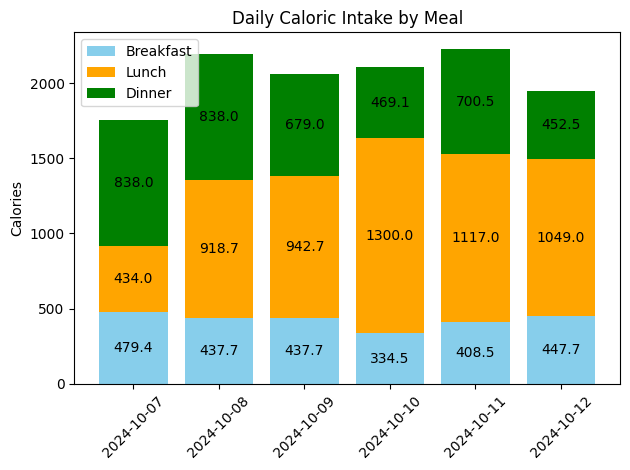

In [12]:
# Now the 'data' variable contains all the aggregated data from the CSV files
# Group data by Date and Meal, summing the calories for each meal type per day
daily_data = data.pivot_table(index='Date', columns='Meal', values='Calories', aggfunc='sum').fillna(0)

# Data for plotting
days = daily_data.index
breakfast = daily_data.get('Breakfast', [0] * len(days))
lunch = daily_data.get('Lunch', [0] * len(days))
dinner = daily_data.get('Dinner', [0] * len(days))

# Create the stacked bar chart for this week's data
fig, ax = plt.subplots()

bars_breakfast = ax.bar(days, breakfast, label='Breakfast', color='skyblue')
bars_lunch = ax.bar(days, lunch, bottom=breakfast, label='Lunch', color='orange')
bars_dinner = ax.bar(days, dinner, bottom=breakfast + lunch, label='Dinner', color='green')

# Add labels and title
ax.set_ylabel('Calories')
ax.set_title('Daily Caloric Intake by Meal')
ax.legend()

# Add numbers on the bars for Breakfast
for bar, value in zip(bars_breakfast, breakfast):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{value:.1f}', ha='center', va='center')

# Add numbers on the bars for Lunch
for bar, value, base in zip(bars_lunch, lunch, breakfast):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, base + height / 2, f'{value:.1f}', ha='center', va='center')

# Add numbers on the bars for Dinner
for bar, value, base in zip(bars_dinner, dinner, breakfast + lunch):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, base + height / 2, f'{value:.1f}', ha='center', va='center')

# Rotate x-ticks for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot for this week
plt.show()

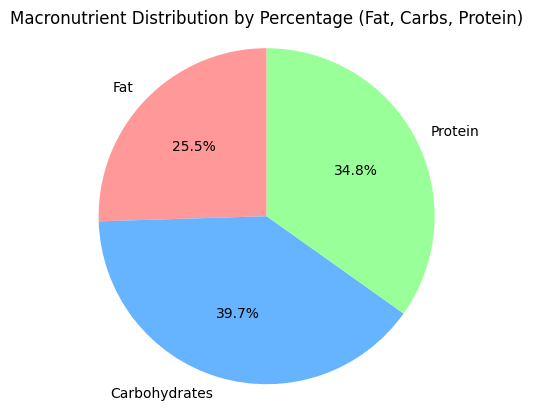

In [13]:
# Sum the total grams of Fat, Carbohydrates, and Protein across all meals
total_fat = data['Fat (g)'].sum()
total_carbs = data['Carbohydrates (g)'].sum()
total_protein = data['Protein (g)'].sum()

# Prepare the data for the pie chart
macros = ['Fat', 'Carbohydrates', 'Protein']
values = [total_fat, total_carbs, total_protein]

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(values, labels=macros, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])

# Equal aspect ratio ensures that the pie chart is drawn as a circle.
ax.axis('equal')  
plt.title('Macronutrient Distribution by Percentage (Fat, Carbs, Protein)')
plt.show()

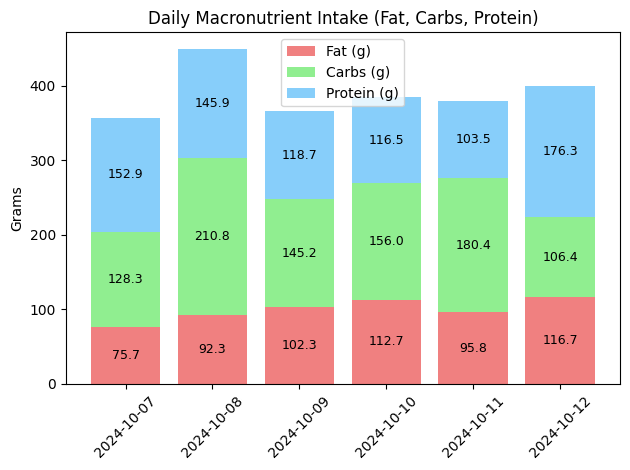

In [14]:
# Group the data by Date and sum the values of Fat, Carbohydrates, and Protein for each day
daily_macros = data.groupby('Date').sum()[['Fat (g)', 'Carbohydrates (g)', 'Protein (g)']]

# Data for plotting
days = daily_macros.index
fat = daily_macros['Fat (g)']
carbs = daily_macros['Carbohydrates (g)']
protein = daily_macros['Protein (g)']

# Create a stacked bar chart
fig, ax = plt.subplots()

bars_fat = ax.bar(days, fat, label='Fat (g)', color='lightcoral')
bars_carbs = ax.bar(days, carbs, bottom=fat, label='Carbs (g)', color='lightgreen')
bars_protein = ax.bar(days, protein, bottom=fat + carbs, label='Protein (g)', color='lightskyblue')

# Add labels and title
ax.set_ylabel('Grams')
ax.set_title('Daily Macronutrient Intake (Fat, Carbs, Protein)')
ax.legend()

# Add data labels on each section of the stacked bars
for bars, macro_data in zip([bars_fat, bars_carbs, bars_protein], [fat, carbs, protein]):
    for bar, value in zip(bars, macro_data):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, 
                f'{value:.1f}', ha='center', va='center', fontsize=9, color='black')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()